# TP53: Effects of mutation in the hotspot compared to other mutations

In [1]:
import pandas as pd
import numpy as np
import re
import scipy.stats
import statsmodels.stats.multitest
import matplotlib.pyplot as plt
import seaborn as sns
import CPTAC

Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [2]:
somatic = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
gene = 'TP53'
protein = 'TP53'

In [3]:
#A list of mutations present in the hotspot according to our Hotspot3D output
hotspot_mutations = ['p.P250L', 'p.R248W', 'p.S241C', 'p.S241del', 'p.K164E', 'p.R249S', 'p.R273H', 'p.R282W',
                    'p.S127Y', 'p.G244D', 'p.A159P']
mutated_hotspot = somatic.loc[(somatic['Location'].isin(hotspot_mutations)) & (somatic['Gene'] == gene)]
hotspot_patients = mutated_hotspot['Clinical_Patient_Key']

In [4]:
p53_mutations = CPTAC.compare_mutations(proteomics, protein, gene)
p53_mutations['Within_Hotspot'] = False
p53_mutations.loc[hotspot_patients, 'Within_Hotspot'] = True
p53_mutations.loc[p53_mutations['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
p53_mutations = p53_mutations.loc[p53_mutations['Patient_Type'] == 'Tumor'].dropna(axis=0)

## Patients with mutation and patients with mutation in the hotspot

In [5]:
print(len(p53_mutations.loc[p53_mutations['Within_Hotspot'] != 'Wildtype']))
print(len(p53_mutations.loc[p53_mutations['Within_Hotspot'] == True]))

23
12


## Hotspot mutation vs non-hotspot mutation

In [6]:
mutated = p53_mutations.loc[p53_mutations['Within_Hotspot'] == True]
wt = p53_mutations.loc[p53_mutations['Within_Hotspot'] == False]
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=3.6077763762794874, pvalue=0.001652838226819021)


## Hotspot mutation vs other mutations and wildtype

In [7]:
mutated = p53_mutations.loc[p53_mutations['Within_Hotspot'] == True]
wt = p53_mutations.loc[p53_mutations['Within_Hotspot'] != True]
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=9.153224321404025, pvalue=2.3989216049456157e-14)


## All mutations vs wildtype

In [8]:
mutated = p53_mutations.loc[p53_mutations['Within_Hotspot'] != 'Wildtype']
wt = p53_mutations.loc[p53_mutations['Within_Hotspot'] == 'Wildtype']
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=5.87288377126809, pvalue=7.869064487646565e-08)


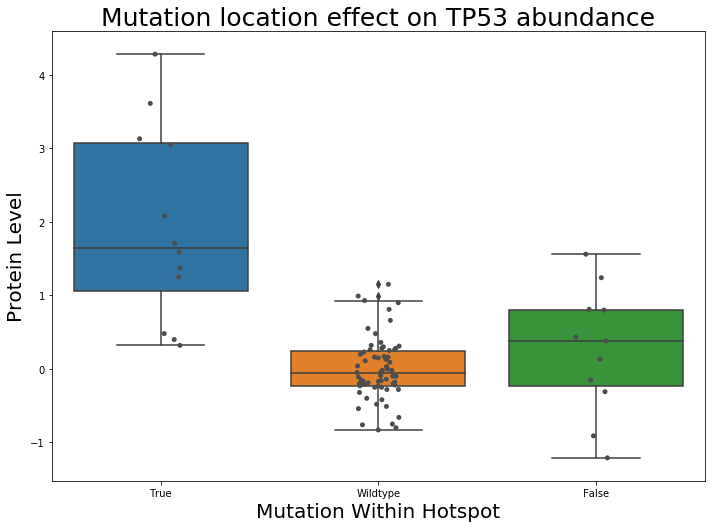

In [9]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = p53_mutations, x = 'Within_Hotspot', y = protein, ax = ax)
boxplt = sns.stripplot(data = p53_mutations, x = 'Within_Hotspot', y = protein, jitter = True, color = '.3')
boxplt.set_title('Mutation location effect on TP53 abundance', fontsize='25')
boxplt.set_xlabel('Mutation Within Hotspot', fontsize='20')
boxplt.set_ylabel('Protein Level', fontsize='20')
plt.show()

### List of proteins that interact with TP53 (according to Uniprot and String)

In [55]:
protList = ['AIMP2', 'ARIH2', 'ARRB1', 'ASH2L', 'ATG7', 'AXIN1', 'BANP', 'BCL2', 'BCL2L1', 'BCR', 'BHLHE40', 'BRCA2',
           'BRD7', 'BTBD2', 'BTRC', 'CABLES1', 'CARM1', 'CCDC106', 'CDKN1A', 'CEBPB', 'CHD8', 'CREBBP', 'CSE1L', 'CSNK2A1', 'CUL7',
           'CUL9', 'CXXC1', 'DAXX', 'DDX17', 'DDX5', 'DROSHA', 'DUSP26', 'DVL2', 'E6', 'EP300', 'ETS2', 'FBXO11',
           'FOXO3', 'GSK3B', 'GTF2H1', 'HDAC1', 'HIPK1', 'HIPK2', 'HMGB1', 'HNRNPK', 'HRMT1L2', 'HSP82', 'HSPA1L', 'HSPA9', 'HSPB1',
           'HTT', 'HUWE1', 'IFI16', 'IFI205B', 'ING4', 'IKBKB', 'IP6K2', 'JMJD6', 'KAT5', 'KAT8', 'KDM1A', 'KMT2E', 'LAMA4',
           'MAGEA2B', 'MAGEC2', 'MAP1B', 'MAPK11', 'MAPKAPK5', 'MDM2', 'MDM4', 'MKRN1', 'MPDZ', 'MT1A', 'NCL', 'NCOR2',
           'NFYA', 'NFYB', 'NOC2L', 'NOL3', 'NPM1', 'NR0B2', 'NR4A1', 'NRDC', 'NSP1', 'NUAK1', 'NUMB', 'OTUB1', 
           'PARD3', 'PARP1', 'PBK', 'PHB', 'PIAS1', 'PIAS2', 'PIAS4', 'PIN1', 'PLK1', 'PML', 'PPIF', 'PPP1CC',
           'PPP1R13L', 'PPP2R1A', 'PPP2R5C', 'PRKCD', 'PSME3', 'PTK2', 'RAD51', 'RBPJ', 'RCHY1', 'RFWD3', 'RING1',
           'RPS3', 'RYBP', 'S100A1', 'S100A2', 'S100A4', 'S100B', 'SAFB', 'SETD7', 'SFN', 'SIN3A', 'SIRT1', 'SMAD2',
           'SMYD2', 'SNAT1', 'SOX4', 'SP1', 'SREBF2', 'SRPK1', 'SUMO1', 'SYVN1', 'TAF1', 'TBP', 'TCF4', 'TOE1', 'TP53BP1',
           'TP53BP2', 'TP53INP1', 'TP63', 'TPT1', 'TRIM24', 'TWIST1', 'UBC', 'UBE3A', 'UHRF2', 'USP42', 'USP7', 'VDR', 'VRK1',
           'WRN', 'WWOX', 'XPO1', 'XRCC6', 'YWHAG', 'YWHAZ', 'ZNF420', 'ATM', 'BAX', 'BCL2L11', 'CCNA1', 'CCNA2', 'CCNB1', 
           'CCNB2', 'CCND1', 'CCND3', 'CCNE1', 'CCNE2', 'CDC25A', 'CDC6', 'CDK2', 'CDKN1B', 'CDKN2A', 'CHEK1', 
           'CHEK2', 'CITED2', 'CKS1B', 'MCM5', 'MRE11A', 'PCNA', 'RB1', 'ARMC10', 'BANP', 'CDKN2AIP', 'NUAK1', 'STK11',
           'LKB1', 'UHRF2', 'E4F1', 'MAML1', 'MKRN1', 'PML', 'FBXO42', 'ATM', 'PP2A', 'PPP2R5C', 'PPP2R2A', 'AURKA', 'DAXX',
           'BRD7', 'TRIM24', 'L3MBTL1', 'GRK5', 'CAK', 'CDK7', 'MAT1', 'CDK5', 'AURKB', 'SETD2', 'UHRF2', 'NOC2L', 'PTK2',
           'FAK1', 'PTK2B', 'PYK2', 'PRKCG', 'PPIF', 'SNAI1', 'KAT6A', 'ANKRD2', 'RFFL', 'RNF34', 'MTA1', 'COP1', 'CCAR2',
           'MORC3', 'POU4F2', 'NOP53', 'AFG1L', 'UBD', 'TAF6', 'FATS', 'C10ORF90']

#Remove possible duplicates
protList = list(set(protList))

## Mutations vs. wildtype

In [66]:
tested = [];
p_vals = [];
for protein in protList: 
    if protein in proteomics.columns:
        tested.append(protein)
        p53_mutations_protein = CPTAC.compare_mutations(proteomics, protein, gene)
        p53_mutations_protein['Within_Hotspot'] = False
        p53_mutations_protein.loc[hotspot_patients, 'Within_Hotspot'] = True
        p53_mutations_protein.loc[p53_mutations_protein['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
        p53_mutations_protein = p53_mutations_protein.loc[p53_mutations_protein['Patient_Type'] == 'Tumor'].dropna(axis=0)
        mutated = p53_mutations_protein.loc[p53_mutations_protein['Within_Hotspot'] != 'Wildtype']
        wt = p53_mutations_protein.loc[p53_mutations_protein['Within_Hotspot'] == 'Wildtype']
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        p_vals.append(ttest[1])

In [67]:
areSignificant = statsmodels.stats.multitest.fdrcorrection(p_vals)[0]
pvals = statsmodels.stats.multitest.fdrcorrection(p_vals)[1]
significant_proteins = np.array(tested)[np.array(areSignificant)]
significant_pvals = np.array(pvals)[np.array(areSignificant)]
significant_vals = dict(zip(significant_proteins, significant_pvals))
significant_vals

{'CCNE1': 0.0023506571956539396,
 'CKS1B': 0.009439951020158592,
 'AFG1L': 0.014108275095242519,
 'PPP2R1A': 0.018620240347116866,
 'PIAS2': 0.038416760235864524,
 'MCM5': 0.0015138440546517092,
 'PRKCD': 0.029733602521992773,
 'AURKA': 0.0011531459892141756,
 'SIN3A': 0.044864232908667125,
 'SFN': 0.022597136071752205,
 'FBXO11': 0.0015138440546517092,
 'CABLES1': 0.0004536897760089756,
 'NOC2L': 0.0016000153707581668,
 'CDKN2A': 0.0007435991736483225,
 'PCNA': 0.0035822453538588085,
 'CHEK2': 0.007300950200014358,
 'CHD8': 0.00033639502281059144,
 'XPO1': 6.7114850113169334e-06,
 'CHEK1': 0.037318266627902136,
 'CDK2': 0.005526204856714129,
 'CCNB2': 0.006217117604398356,
 'TP53BP2': 0.006217117604398356,
 'PPP2R2A': 0.0017493793543461001,
 'STK11': 0.021099891621969794,
 'CSE1L': 6.7114850113169334e-06,
 'SMYD2': 0.007683329255683732,
 'DAXX': 0.0011142226828385138,
 'CDKN1A': 0.009566545763368016,
 'CCNA2': 0.0012865651988968447,
 'CCNB1': 0.0010622052601424099,
 'CSNK2A1': 0.00024

## Mutations outside of hotspot vs. wildtype

In [60]:
tested = [];
p_vals = [];
for protein in protList: 
    if protein in proteomics.columns:
        tested.append(protein)
        p53_mutations_protein = CPTAC.compare_mutations(proteomics, protein, gene)
        p53_mutations_protein['Within_Hotspot'] = False
        p53_mutations_protein.loc[hotspot_patients, 'Within_Hotspot'] = True
        p53_mutations_protein.loc[p53_mutations_protein['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
        p53_mutations_protein = p53_mutations_protein.loc[p53_mutations_protein['Patient_Type'] == 'Tumor'].dropna(axis=0)
        mutated = p53_mutations_protein.loc[p53_mutations_protein['Within_Hotspot'] == False]
        wt = p53_mutations_protein.loc[p53_mutations_protein['Within_Hotspot'] == 'Wildtype']
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        p_vals.append(ttest[1])

In [61]:
areSignificant = statsmodels.stats.multitest.fdrcorrection(p_vals)[0]
pvals = statsmodels.stats.multitest.fdrcorrection(p_vals)[1]
significant_proteins = np.array(tested)[np.array(areSignificant)]
significant_pvals = np.array(pvals)[np.array(areSignificant)]
significant_vals = dict(zip(significant_proteins, significant_pvals))
significant_vals

{'BCR': 0.011776557697635559,
 'CABLES1': 0.010566500615513183,
 'CDKN2A': 0.027742254901090817,
 'CHD8': 0.005259504567800893,
 'XPO1': 0.011776557697635559,
 'TP53BP2': 0.03487218136786081,
 'UBE3A': 0.027742254901090817,
 'CSE1L': 0.0006985583906701212,
 'CSNK2A1': 0.0042080093263923354,
 'PLK1': 0.032982404271177525,
 'CDKN2AIP': 0.04576051723810227}

## Mutations within the hotspot vs. wildtype

In [62]:
tested = [];
p_vals = [];
for protein in protList: 
    if protein in proteomics.columns:
        tested.append(protein)
        p53_mutations_protein = CPTAC.compare_mutations(proteomics, protein, gene)
        p53_mutations_protein['Within_Hotspot'] = False
        p53_mutations_protein.loc[hotspot_patients, 'Within_Hotspot'] = True
        p53_mutations_protein.loc[p53_mutations_protein['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
        p53_mutations_protein = p53_mutations_protein.loc[p53_mutations_protein['Patient_Type'] == 'Tumor'].dropna(axis=0)
        mutated = p53_mutations_protein.loc[p53_mutations_protein['Within_Hotspot'] == True]
        wt = p53_mutations_protein.loc[p53_mutations_protein['Within_Hotspot'] == 'Wildtype']
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        p_vals.append(ttest[1])

In [63]:
areSignificant = statsmodels.stats.multitest.fdrcorrection(p_vals)[0]
pvals = statsmodels.stats.multitest.fdrcorrection(p_vals)[1]
significant_proteins = np.array(tested)[np.array(areSignificant)]
significant_pvals = np.array(pvals)[np.array(areSignificant)]
significant_vals = dict(zip(significant_proteins, significant_pvals))
significant_vals

{'CCNE1': 0.004782308324228505,
 'CKS1B': 0.0034323119938766233,
 'AFG1L': 0.02939412064392125,
 'PPP2R1A': 0.02939412064392125,
 'PIAS2': 0.01410021820952806,
 'MCM5': 0.004050044953871392,
 'AURKA': 0.00033331618391206906,
 'PPP2R5C': 0.04886992577911222,
 'FBXO11': 0.0003777011574337987,
 'CABLES1': 0.01088343535225777,
 'NOC2L': 0.0060636717996748945,
 'CDKN2A': 0.0060636717996748945,
 'PCNA': 0.015425290895964356,
 'CHEK2': 0.007802520176992839,
 'CHD8': 0.008870105727670994,
 'XPO1': 0.00033331618391206906,
 'CDK2': 0.03693096550079656,
 'CCNB2': 0.039994045438675546,
 'SAFB': 0.009544881258383398,
 'PPP2R2A': 0.01410021820952806,
 'SIRT1': 0.028758669208855128,
 'STK11': 0.0009546378694711266,
 'CSE1L': 0.0009546378694711266,
 'SMYD2': 0.04315555922600078,
 'DAXX': 0.0034323119938766233,
 'CCNA2': 0.004646073072402053,
 'HUWE1': 0.039994045438675546,
 'CCNB1': 0.009468032078238157,
 'CSNK2A1': 0.011803123470556742,
 'PLK1': 0.0009546378694711266,
 'VRK1': 0.0009546378694711266,


## Mutations within the hotspot vs. other mutations

In [64]:
tested = [];
p_vals = [];
for protein in protList: 
    if protein in proteomics.columns:
        tested.append(protein)
        p53_mutations_protein = CPTAC.compare_mutations(proteomics, protein, gene)
        p53_mutations_protein['Within_Hotspot'] = False
        p53_mutations_protein.loc[hotspot_patients, 'Within_Hotspot'] = True
        p53_mutations_protein.loc[p53_mutations_protein['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
        p53_mutations_protein = p53_mutations_protein.loc[p53_mutations_protein['Patient_Type'] == 'Tumor'].dropna(axis=0)
        mutated = p53_mutations_protein.loc[p53_mutations_protein['Within_Hotspot'] == True]
        wt = p53_mutations_protein.loc[p53_mutations_protein['Within_Hotspot'] == False]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        p_vals.append(ttest[1])

In [65]:
areSignificant = statsmodels.stats.multitest.fdrcorrection(p_vals)[0]
pvals = statsmodels.stats.multitest.fdrcorrection(p_vals)[1]
significant_proteins = np.array(tested)[np.array(areSignificant)]
significant_pvals = np.array(pvals)[np.array(areSignificant)]
significant_vals = dict(zip(significant_proteins, significant_pvals))
significant_vals

{}

## Single protein plot

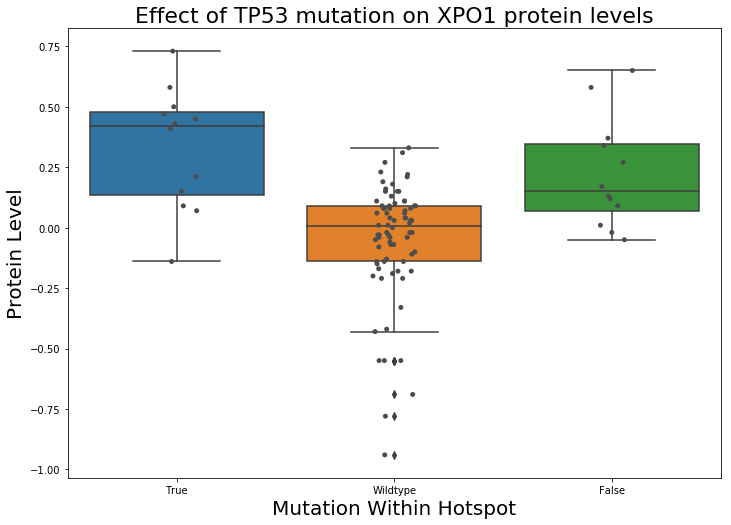

In [71]:
plt_protein = 'XPO1'
pltdf = CPTAC.compare_mutations(proteomics, plt_protein, gene)
pltdf['Within_Hotspot'] = False
pltdf.loc[hotspot_patients, 'Within_Hotspot'] = True
pltdf.loc[pltdf['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
pltdf = pltdf.loc[pltdf['Patient_Type'] == 'Tumor'].dropna(axis=0)

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = pltdf, x = 'Within_Hotspot', y = plt_protein, ax = ax)
boxplt = sns.stripplot(data = pltdf, x = 'Within_Hotspot', y = plt_protein, jitter = True, color = '.3')
boxplt.set_xlabel('Mutation Within Hotspot', fontsize='20')
boxplt.set_ylabel('Protein Level', fontsize='20')
boxplt.set_title("Effect of TP53 mutation on " + plt_protein + " protein levels", fontsize='22')
plt.show()

## Plot all significant proteins

In [72]:
proteins_to_plot = ['HSP90AB1', 'STK11', 'YWHAZ', 'AURKA', 'DAXX', 'AFG1L', 'CDK2', 'CABLES1', 'CHD8', 'CDKN2AIP', 
                    'FAS', 'CDKN2A', 'CCNB1', 'TAF1']

plotdf = CPTAC.compare_mutations(proteomics, gene)
plotdf = plotdf.loc[plotdf['Patient_Type'] == 'Tumor'][[gene, 'Mutation']]
for protein in proteins_to_plot:
    proteindf = CPTAC.compare_mutations(proteomics, protein, gene)[[protein]]
    plotdf = plotdf.join(proteindf)

plotdf['Within_Hotspot'] = False
plotdf.loc[hotspot_patients, 'Within_Hotspot'] = True
plotdf.loc[plotdf['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
plotdf = pd.melt(plotdf, id_vars = ['Mutation', 'Within_Hotspot'], var_name = 'Protein', value_name = 'Proteomics')
plotdf = plotdf.dropna(axis = 0)

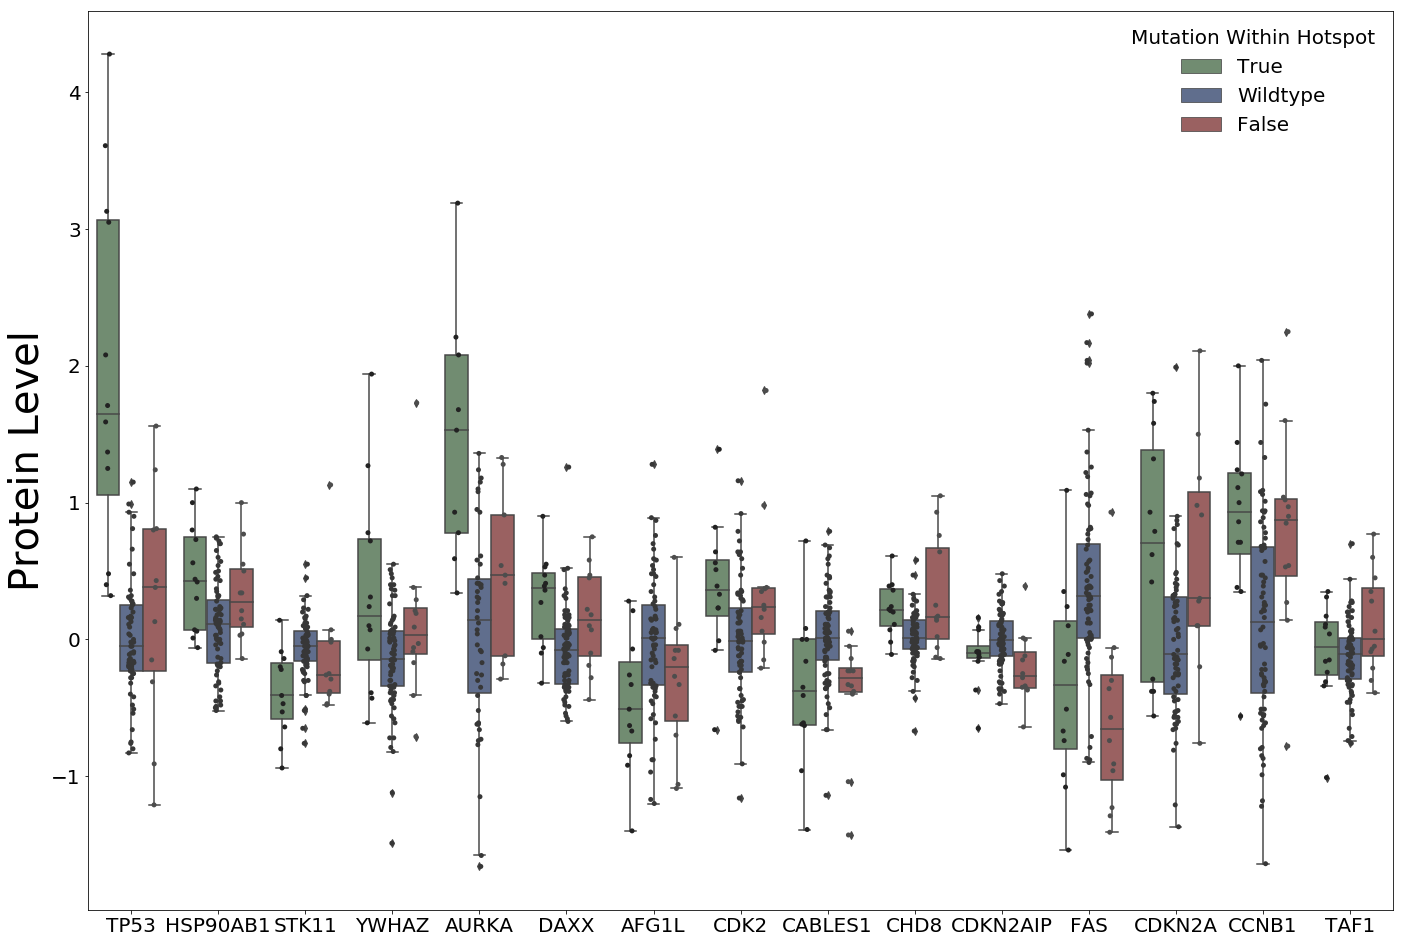

In [73]:
a4_dims = (23.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
my_pal = {True: "#6C906D", "Wildtype": "#596B94", False: "#A35857"}

#Create the plot
boxplt = sns.boxplot(x='Protein', y='Proteomics', hue='Within_Hotspot', data=plotdf, palette = my_pal)
boxplt = sns.stripplot(data=plotdf, x='Protein', y='Proteomics', hue='Within_Hotspot', dodge=True, jitter=True, color='.3')

#Add styling
boxplt.set_xlabel('')
boxplt.set_ylabel('Protein Level', fontsize='40')
boxplt.tick_params(labelsize='20')

#Adjust legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:3], [True, 'Wildtype', False], title='Mutation Within Hotspot', fontsize='20', frameon=False)
boxplt.get_legend().get_title().set_fontsize('20')
#boxplt.get_legend().set_bbox_to_anchor((0.15, 0.15, 0, 0))